
Training with Sigmoid activation...
Epoch [1/5], Loss: 0.4975, Test Acc: 92.88%
Epoch [2/5], Loss: 0.1843, Test Acc: 95.57%
Epoch [3/5], Loss: 0.1261, Test Acc: 96.27%
Epoch [4/5], Loss: 0.0965, Test Acc: 96.80%
Epoch [5/5], Loss: 0.0797, Test Acc: 96.88%

Training with Tanh activation...
Epoch [1/5], Loss: 0.3118, Test Acc: 95.27%
Epoch [2/5], Loss: 0.1513, Test Acc: 96.03%
Epoch [3/5], Loss: 0.1210, Test Acc: 95.24%
Epoch [4/5], Loss: 0.1083, Test Acc: 96.77%
Epoch [5/5], Loss: 0.0977, Test Acc: 96.28%

Training with ReLU activation...
Epoch [1/5], Loss: 0.3454, Test Acc: 94.05%
Epoch [2/5], Loss: 0.1544, Test Acc: 95.85%
Epoch [3/5], Loss: 0.1160, Test Acc: 96.74%
Epoch [4/5], Loss: 0.0921, Test Acc: 97.16%
Epoch [5/5], Loss: 0.0786, Test Acc: 97.23%

Training with LeakyReLU activation...
Epoch [1/5], Loss: 0.3198, Test Acc: 94.99%
Epoch [2/5], Loss: 0.1412, Test Acc: 96.38%
Epoch [3/5], Loss: 0.1062, Test Acc: 96.27%
Epoch [4/5], Loss: 0.0879, Test Acc: 96.92%
Epoch [5/5], Loss: 0

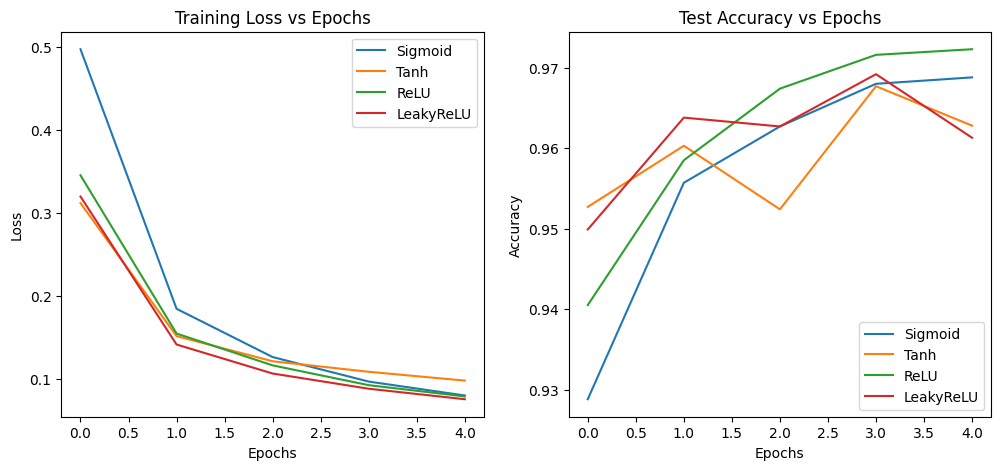

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)


class SimpleNN(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.activation = activation_fn

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)


def train_and_eval(activation_fn, epochs=5):
    model = SimpleNN(activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Evaluate on test set
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = correct / total
        test_accuracies.append(acc)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Test Acc: {acc*100:.2f}%")

    return train_losses, test_accuracies


activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(0.1)
}

results = {}
for name, act in activations.items():
    print(f"\nTraining with {name} activation...")
    train_losses, test_accuracies = train_and_eval(act, epochs=5)
    results[name] = (train_losses, test_accuracies)


plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
for name, (losses, accs) in results.items():
    plt.plot(losses, label=name)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.subplot(1,2,2)
for name, (losses, accs) in results.items():
    plt.plot(accs, label=name)
plt.title("Test Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
